In [5]:
from scipy.signal import butter, lfilter

def apply_low_pass_filter(amplitude, cutoff_frequency=10.0, sampling_rate=50.0):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(3, normal_cutoff, btype='low')
    filtered_amplitude = lfilter(b, a, amplitude, axis=0)

    return filtered_amplitude

,label,amplitudes
0,0,"[7.652516351347274, 7.652516351347274, 7.65251..."
1,0,"[27.571953930630194, 27.571953930630194, 27.57..."
2,0,"[36.236652889554186, 36.236652889554186, 36.23..."
3,0,"[17.96229029586535, 17.96229029586535, 17.9622..."
4,0,"[-3.1663018667419234, -3.1663018667419234, -3...."


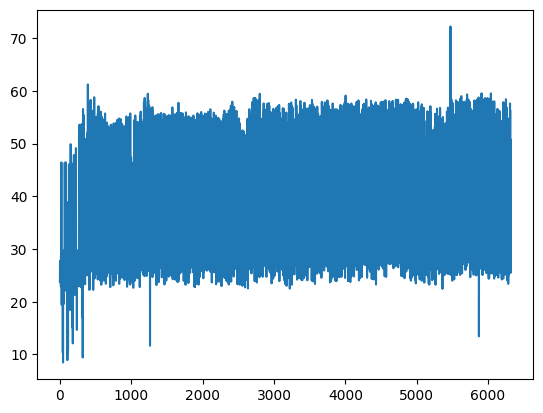

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

f = open('absence.dat', 'r')
reader = csv.reader(f)

data = []
for row in reader:
    tmp = row[-1][1:-1].split(',')
    if len(tmp) < 384:
        continue
    data.append([np.sqrt(int(x)**2+int(y)**2) for y, x in zip(tmp[::2], tmp[1::2])])

data = np.array(data).T
filtered_amplitude_data = apply_low_pass_filter(data)

ls = []
for row in filtered_amplitude_data:
    abs_data = \
    {
        'label': 0,
        'amplitudes': row.flatten()
    }
    ls.append(abs_data)
abs_df = pd.DataFrame(ls)
display(abs_df.head())


plt.plot(range(filtered_amplitude_data.shape[1]), filtered_amplitude_data[191])
plt.show()

,label,amplitudes
187,1,"[21.299071906854376, 20.77492782064467, 24.196..."
188,1,"[21.367158281147308, 21.003719694738756, 24.94..."
189,1,"[21.322063237049317, 21.339271270487572, 25.29..."
190,1,"[21.204145479369473, 21.44586501204635, 24.902..."
191,1,"[19.327141232499333, 19.442516372262826, 22.44..."


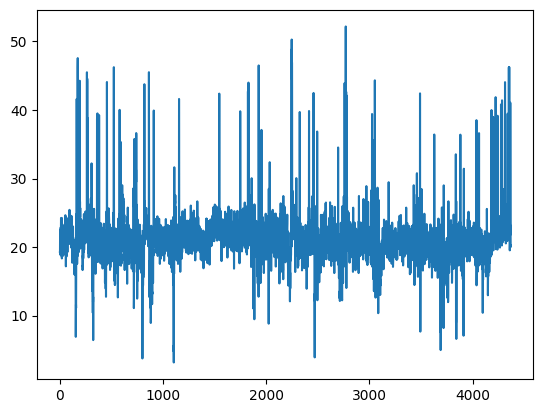

In [69]:
f = open('detected.dat', 'r')
reader = csv.reader(f)

data = []
for row in reader:
    tmp = row[-1][1:-1].split(',')
    if len(tmp) < 384:
        continue
    data.append([np.sqrt(int(x)**2+int(y)**2) for y, x in zip(tmp[::2], tmp[1::2])])

data = np.array(data).T
filtered_amplitude_data = apply_low_pass_filter(data)

ls = []
for row in filtered_amplitude_data:
    det_data = \
    {
        'label': 1,
        'amplitudes': row.flatten()
    }
    ls.append(det_data)
det_df = pd.DataFrame(ls)
display(det_df.tail())

plt.plot(range(filtered_amplitude_data.shape[1]), filtered_amplitude_data[191])
plt.show()

In [70]:
combined_df = pd.concat([abs_df, det_df], ignore_index=True)

from sklearn.model_selection import train_test_split

X = pd.DataFrame(combined_df['amplitudes'].tolist()).dropna(axis=1, how='any')
y = combined_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X

X_train shape: (314, 4372)
X_test shape: (70, 4372)
y_train shape: (314,)
y_test shape: (70,)


,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,...,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516
1,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,...,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954
2,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,...,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653
3,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,...,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290
4,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,...,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,21.299072,20.774928,24.196907,22.563234,22.504604,22.103046,19.930239,22.467621,23.782501,20.838047,...,20.099417,23.632002,23.250296,22.033903,42.157019,23.734049,25.222288,22.591370,21.030293,21.753711
380,21.367158,21.003720,24.944855,23.417831,22.918803,22.548663,20.302500,23.363756,24.484087,22.316069,...,21.309903,24.322623,24.715620,22.667665,43.861287,24.651632,25.533224,23.317998,21.995776,22.334097
381,21.322063,21.339271,25.290385,24.165171,22.901547,22.737756,20.583760,23.682588,25.076040,23.544265,...,22.184154,24.789500,25.880459,23.578347,44.393787,25.613712,25.595105,23.592768,22.506099,22.598043
382,21.204145,21.445865,24.902889,24.288644,22.681941,22.478729,20.710913,23.289562,25.207211,23.585874,...,22.346249,24.942113,26.010460,23.938615,44.169221,26.075572,25.760352,23.368448,22.241828,22.324635


In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

columns_pca = [f'PC{i+1}' for i in range(2)]
X_train_pca_df = pd.DataFrame(data=X_train_pca, columns=columns_pca)
X_test_pca_df = pd.DataFrame(data=X_test_pca, columns=columns_pca)

print("X_train PCA:")
print(X_train_pca_df.head())

print("\nX_test PCA:")
print(X_test_pca_df.head())

X_train PCA:
          PC1        PC2
0   41.356425   3.268087
1  -98.583185 -23.233123
2  -51.802175 -21.715382
3  -36.976068 -20.655494
4  131.538934 -10.300492

X_test PCA:
          PC1        PC2
0   -9.603326  17.065242
1   46.257196   4.223066
2  -32.943078  19.859090
3 -110.848595  33.984395
4   40.281834   3.403573


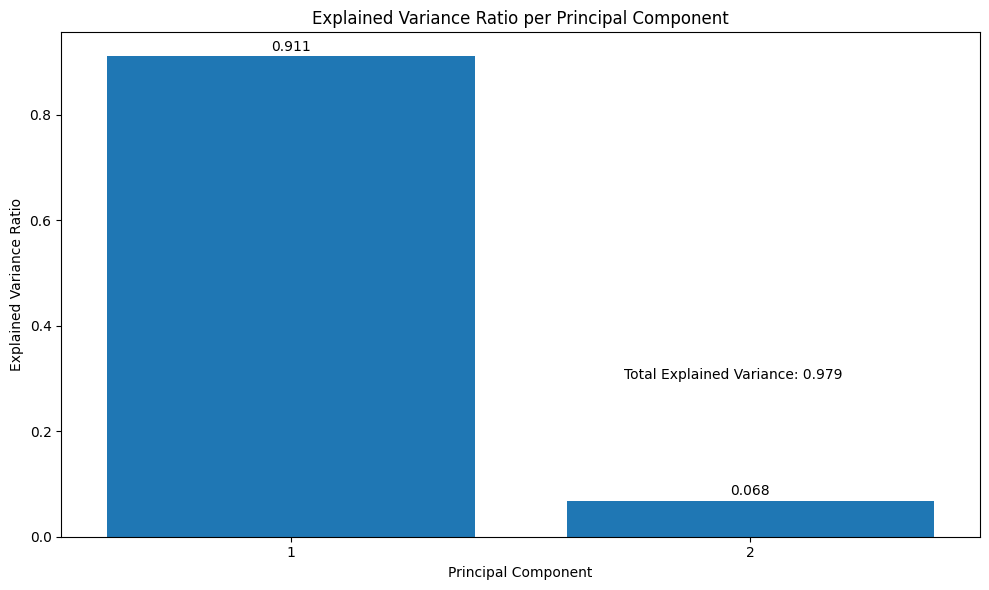

In [72]:
sorted_variance_ratio = sorted(pca.explained_variance_ratio_, reverse=True)
plt.figure(figsize=(10, 6))

plt.bar(range(1, len(sorted_variance_ratio) + 1), sorted_variance_ratio)

plt.xlim(0.5, len(sorted_variance_ratio) + 0.5)
plt.xticks(range(1, len(sorted_variance_ratio) + 1))

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

for i, ratio in enumerate(sorted_variance_ratio):
    plt.text(i + 1, ratio + 0.005, f'{ratio:.3f}', ha='center', va='bottom')

total_variance_ratio = sum(sorted_variance_ratio)

text_box = f'Total Explained Variance: {total_variance_ratio:.3f}'
plt.text(len(sorted_variance_ratio) + 0.2, 0.30, text_box, ha='right')

plt.tight_layout()
plt.show()

In [73]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline

# def create_lstm_model(units=50, optimizer='adam', dropout_rate=0.1):
#     model = Sequential()
#     model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train_pca.shape[1], 1)))
#     model.add(Dropout(dropout_rate))
#     model.add(LSTM(units=64))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1))
#     model.compile(loss="mse", optimizer=optimizer, metrics=['accuracy'])
#     return model

# pipeline = Pipeline([
#     ('scaler', MinMaxScaler()),
#     ('lstm', KerasClassifier(build_fn=create_lstm_model, verbose=1))
# ])

# param_grid = {
#     'lstm__units': [32, 50, 64 , 100, 128],
#     'lstm__optimizer': ['adam', 'rmsprop'],
#     'lstm__epochs': [10, 20, 30],
#     'lstm__batch_size': [32, 64]
# }

# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_pca_df, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'lstm__batch_size': 64, 'lstm__epochs': 30, 'lstm__optimizer': 'rmsprop', 'lstm__units': 128}

Epoch 1/30
5/5 [==============================] - 2s 156ms/step - loss: 0.6868 - accuracy: 0.5605 - val_loss: 0.6473 - val_accuracy: 0.6429
Epoch 2/30
5/5 [==============================] - 0s 53ms/step - loss: 0.6344 - accuracy: 0.7197 - val_loss: 0.6157 - val_accuracy: 0.7429
Epoch 3/30
5/5 [==============================] - 0s 51ms/step - loss: 0.5945 - accuracy: 0.7675 - val_loss: 0.5770 - val_accuracy: 0.7429
Epoch 4/30
5/5 [==============================] - 0s 60ms/step - loss: 0.5497 - accuracy: 0.7866 - val_loss: 0.5329 - val_accuracy: 0.7429
Epoch 5/30
5/5 [==============================] - 0s 50ms/step - loss: 0.5129 - accuracy: 0.7898 - val_loss: 0.4801 - val_accuracy: 0.7429
Epoch 6/30
5/5 [==============================] - 0s 55ms/step - loss: 0.4432 - accuracy: 0.8121 - val_loss: 0.4326 - val_accuracy: 0.7429
Epoch 7/30
5/5 [==============================] - 0s 57ms/step - loss: 0.4156 - accuracy: 0.8089 - val_loss: 0.3879 - val_accuracy: 0.7429
Epoch 8/30
5/5 [==========

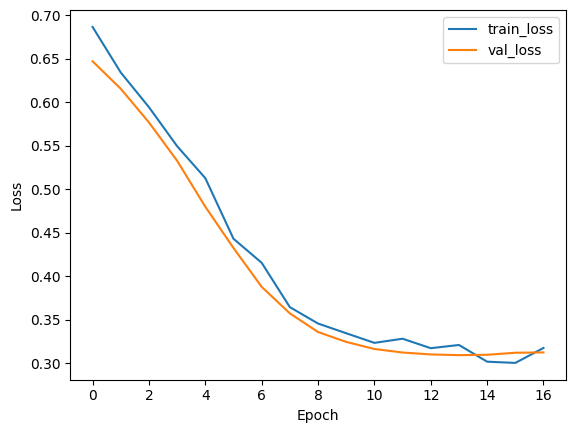

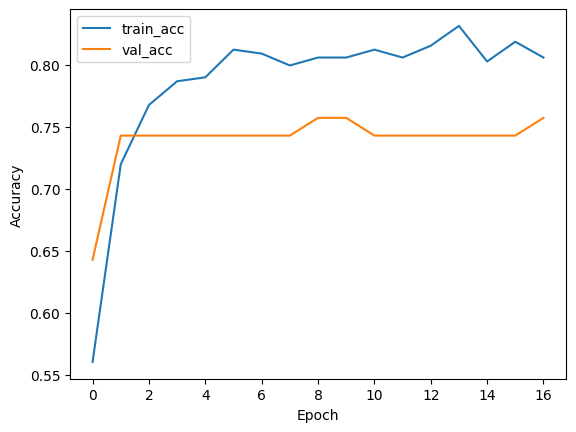

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        41
           1       0.63      1.00      0.77        29

    accuracy                           0.76        70
   macro avg       0.82      0.79      0.76        70
weighted avg       0.85      0.76      0.75        70



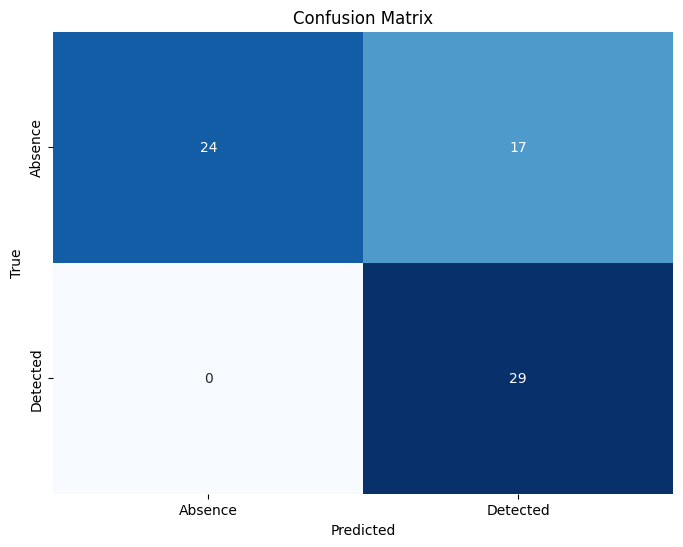

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

lstm_units = 128
optimizer = Adam(learning_rate=0.001)

def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train_pca_df.shape[1], 1)))
    model.add(Dropout(0.5))
    model.add(LSTM(units=64))
    model.add(Dropout(0.5))
    model.add(Dense(100,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

early_stopping = EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = ModelCheckpoint(filepath="LSTM_model2.hdf5", monitor="val_loss", save_best_only=True)

model = create_lstm_model()

history = model.fit(X_train_pca_df, y_train, epochs=30, batch_size=64, validation_data=(X_test_pca_df, y_test), callbacks=[early_stopping, model_checkpoint])

y_pred_prob = model.predict(X_test_pca_df)
y_pred = (y_pred_prob > 0.5).astype(int)

plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Absence', 'Detected'], yticklabels=['Absence', 'Detected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

,label,amplitudes
0,0,"[7.652516351347274, 7.652516351347274, 7.65251..."
1,0,"[27.571953930630194, 27.571953930630194, 27.57..."
2,0,"[36.236652889554186, 36.236652889554186, 36.23..."
3,0,"[17.96229029586535, 17.96229029586535, 17.9622..."
4,0,"[-3.1663018667419234, -3.1663018667419234, -3...."


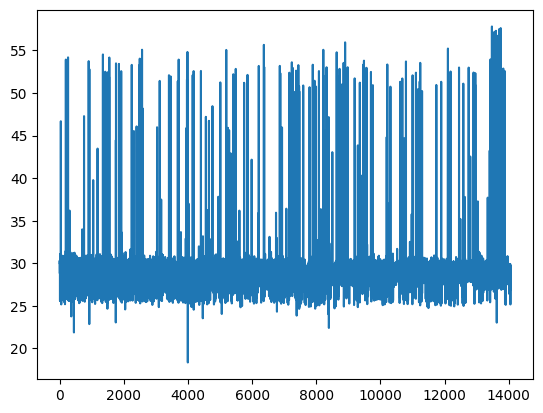

In [33]:
f = open('absence2.dat', 'r')
reader = csv.reader(f)

data = []
for row in reader:
    tmp = row[-1][1:-1].split(',')
    if len(tmp) < 384:
        continue
    data.append([np.sqrt(int(x)**2+int(y)**2) for y, x in zip(tmp[::2], tmp[1::2])])

data = np.array(data).T
filtered_amplitude_data = apply_low_pass_filter(data)

ls = []
for row in filtered_amplitude_data:
    abs_data = \
    {
        'label': 0,
        'amplitudes': row.flatten()
    }
    ls.append(abs_data)
abs_df = pd.DataFrame(ls)
display(abs_df.head())


plt.plot(range(filtered_amplitude_data.shape[1]), filtered_amplitude_data[191])
plt.show()

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

,label,amplitudes
187,1,"[22.40082214179772, 20.156612941353096, 26.455..."
188,1,"[23.13992116005241, 20.370278247174358, 26.586..."
189,1,"[23.366622548006657, 21.147113811003965, 26.27..."
190,1,"[23.23471940682952, 21.632005365362023, 25.919..."
191,1,"[21.691557442072938, 19.78903144158663, 23.765..."


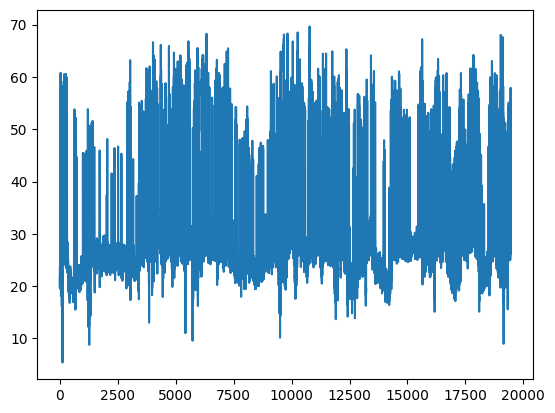

In [34]:
f = open('detected2.dat', 'r')
reader = csv.reader(f)

data = []
for row in reader:
    try:
        tmp = row[-1][1:-1].split(',')
        if len(tmp) < 384:
            continue
        data.append([np.sqrt(int(x)**2+int(y)**2) for y, x in zip(tmp[::2], tmp[1::2])])
    except Exception as e:
        print(e)

data = np.array(data).T
filtered_amplitude_data = apply_low_pass_filter(data)

ls = []
for row in filtered_amplitude_data:
    det_data = \
    {
        'label': 1,
        'amplitudes': row.flatten()
    }
    ls.append(det_data)
det_df = pd.DataFrame(ls)
display(det_df.tail())

plt.plot(range(filtered_amplitude_data.shape[1]), filtered_amplitude_data[191])
plt.show()

In [35]:
combined_df = pd.concat([abs_df, det_df], ignore_index=True)

from sklearn.model_selection import train_test_split

X = pd.DataFrame(combined_df['amplitudes'].tolist()).dropna(axis=1, how='any')
y = combined_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X

X_train shape: (314, 14065)
X_test shape: (70, 14065)
y_train shape: (314,)
y_test shape: (70,)


,0,1,2,3,4,5,6,7,8,9,...,14055,14056,14057,14058,14059,14060,14061,14062,14063,14064
0,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,...,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516,7.652516
1,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,...,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954,27.571954
2,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,...,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653,36.236653
3,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,...,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290,17.962290
4,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,...,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302,-3.166302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,22.400822,20.156613,26.455804,22.185286,25.334110,22.541766,23.712062,24.284943,47.877520,24.316841,...,20.287544,22.164250,20.324452,23.013900,20.922244,21.730737,21.275476,22.047221,22.365096,20.894118
380,23.139921,20.370278,26.586611,23.296012,25.997637,22.296478,23.910721,24.947211,49.172741,25.262180,...,20.953874,22.602817,20.553897,23.774093,20.853627,21.943151,22.210285,22.618501,22.912280,21.067669
381,23.366623,21.147114,26.270596,24.265441,26.665841,22.516978,23.381567,25.582761,50.520570,26.023592,...,21.370929,22.249525,20.443001,24.854654,21.076592,22.172849,23.213950,23.046732,23.320996,21.276249
382,23.234719,21.632005,25.919322,24.442370,26.487488,22.251968,22.450710,25.761128,51.059760,25.763635,...,21.320766,21.478220,20.203811,25.315885,21.066543,21.973757,23.198946,22.970176,23.180119,21.219814


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

columns_pca = [f'PC{i+1}' for i in range(2)]
X_train_pca_df = pd.DataFrame(data=X_train_pca, columns=columns_pca)
X_test_pca_df = pd.DataFrame(data=X_test_pca, columns=columns_pca)

print("X_train PCA:")
print(X_train_pca_df.head())

print("\nX_test PCA:")
print(X_test_pca_df.head())

X_train PCA:
          PC1        PC2
0   89.830047  -7.047254
1 -175.067026  -1.837882
2  -22.496980  -5.219861
3 -116.586837  -3.113615
4  233.411875 -10.026024

X_test PCA:
          PC1        PC2
0  -43.850098   9.981454
1   80.284636  22.727450
2  -99.016992 -23.584732
3 -159.395713 -44.439077
4  105.634272  -7.576412


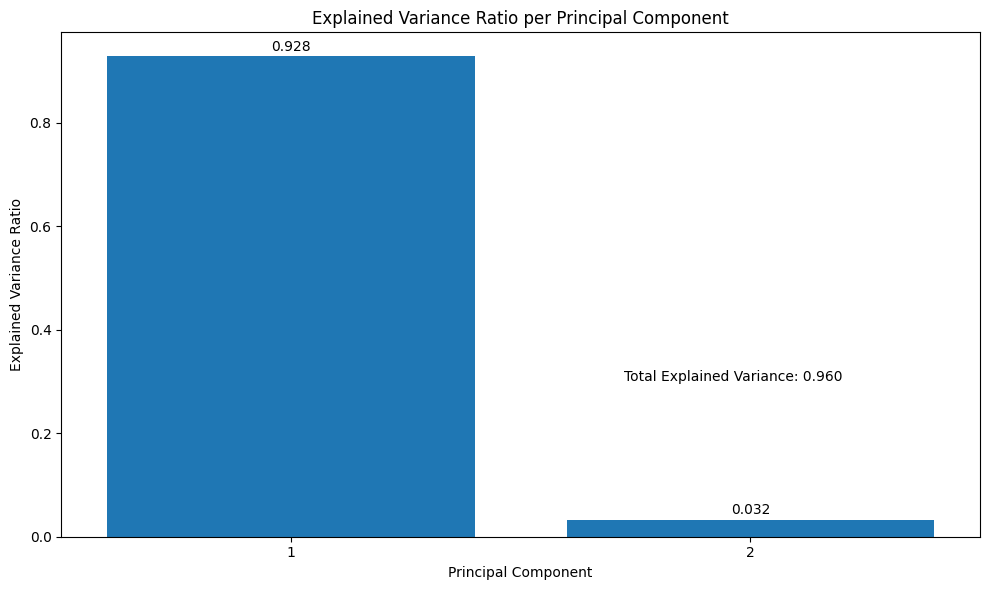

In [37]:
sorted_variance_ratio = sorted(pca.explained_variance_ratio_, reverse=True)
plt.figure(figsize=(10, 6))

plt.bar(range(1, len(sorted_variance_ratio) + 1), sorted_variance_ratio)

plt.xlim(0.5, len(sorted_variance_ratio) + 0.5)
plt.xticks(range(1, len(sorted_variance_ratio) + 1))

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

for i, ratio in enumerate(sorted_variance_ratio):
    plt.text(i + 1, ratio + 0.005, f'{ratio:.3f}', ha='center', va='bottom')

total_variance_ratio = sum(sorted_variance_ratio)

text_box = f'Total Explained Variance: {total_variance_ratio:.3f}'
plt.text(len(sorted_variance_ratio) + 0.2, 0.30, text_box, ha='right')

plt.tight_layout()
plt.show()

3/3 [==============================] - 0s 2ms/step
Accuracy: 0.8


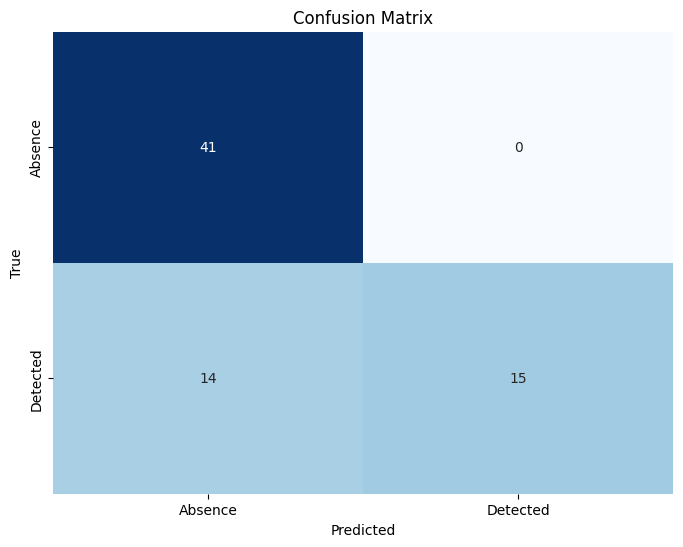

In [39]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix

model = load_model("LSTM_model2.hdf5")

y_pred_prob = model.predict(X_test_pca_df)
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Absence', 'Detected'], yticklabels=['Absence', 'Detected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()